Este Notebook é parte da <b>Data Scientist with Python Career Track</b> da plataforma DataCamp<br>
Além das resoluções, este notebook pode conter outras análises e modificações realizadas por mim.<br>
<hr/>

#  <font color='red'> A história do GitHub da linguagem Scala<hr>

# Análise Guiada 

## 1. Dados do repositório de projetos do mundo real do Scala<br>
Com quase 30 mil commits e um histórico de mais de dez anos, Scala é uma linguagem de programação madura. É uma linguagem de programação de uso geral que recentemente se tornou outra linguagem proeminente para cientistas de dados.<br>

Scala também é um projeto de código aberto. Projetos de código aberto têm a vantagem de que todo o histórico de desenvolvimento - quem fez as alterações, o que foi alterado, revisões de código, etc. - estão disponíveis publicamente.<br>

Vamos ler, limpar e visualizar o repositório de projetos do mundo real do Scala que abrange dados de um sistema de controle de versão (Git) e de um site de hospedagem de projetos (GitHub). Descobriremos quem teve mais influência em seu desenvolvimento e quem são os especialistas.<b>

O conjunto de dados que usaremos, previamente minerado e extraído do GitHub, é composto por três arquivos:

* `pulls_2011-2013.csv` contém as informações básicas sobre as solicitações de pull e abrange desde o final de 2011 até (mas não incluindo) 2014.
* `pulls_2014-2018.csv` contém informações idênticas e abrange de 2014 a 2018.
* `pull_files.csv` contém os arquivos que foram modificados por cada pull request.

### Dicionário de dados

pid:
user:
date:
file:

### Importando bibliotecas, carregando e visualizando os datasets

In [1]:
# Importando Biliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carregando os dados

pulls_one = pd.read_csv('Datasets/pulls_2011-2013.csv', sep=',')
pulls_two = pd.read_csv('Datasets/pulls_2014-2018.csv', sep=',')
pulls = pd.read_csv('Datasets/pulls.csv', sep=',') 
pulls_files = pd.read_csv('Datasets/pull_files.csv', sep=',')

In [3]:
# Visualizando 5 amostras de cada dataset

print(pulls_one.sample(5))
print(pulls_two.sample(5))
print(pulls_files.sample(5))

          pid      user                  date
1358  3781237   secwall  2013-01-22T14:51:48Z
2659  1439228     lrytz  2012-05-28T11:48:00Z
3183   708242     cvogt  2012-01-19T03:27:11Z
3187   700953  dcsobral  2012-01-17T20:12:29Z
3213   637271  jsuereth  2011-12-29T13:40:07Z
           pid       user                  date
2502  15707106   retronym  2014-05-09T15:36:36Z
1600  40927113  SethTisue  2015-07-27T17:16:56Z
1522  44828993    janekdb  2015-09-11T21:04:53Z
1816  33204139   adriaanm  2015-04-13T21:12:55Z
2196  22762506      lrytz  2014-10-15T06:05:45Z
            pid                                               file
82442   1148013  test/files/neg/macro-invalidsig-ctx-badargc/Im...
41709   7609740               test/files/run/patmat-behavior.scala
15198  56754009                    test/scaladoc/run/SI-6017.scala
76147   1594831  src/compiler/scala/tools/nsc/typechecker/Typer...
45361   5663070                         test/files/run/t6720.scala


## 2. Preparação e limpeza dos dados<br>

Primeiro, precisaremos combinar os dados dos dois DataFrames pull separados.<br>

Em seguida, os dados brutos extraídos do GitHub contêm datas no formato ISO8601. No entanto, os pandas os importam como strings regulares. Para facilitar nossa análise, precisamos converter as strings em objetos DateTime do Python. Os objetos DateTime têm a propriedade importante de que podem ser comparados e classificados.<br>

Os tempos de solicitação de pull estão todos em UTC (também conhecido como Tempo Universal Coordenado). Os tempos de confirmação, no entanto, estão na hora local do autor com informações de fuso horário (número de horas de diferença do UTC). Para facilitar as comparações, devemos converter todos os horários para UTC.<br>

# Combinando os datasets

In [4]:
# Utilizando método concat do pandas para combinar os dois datasets
# Os argumentos utilizados garantem que o index será ignorado e uma nova ordem de index será gerada, além da verificação de integridade
# que evitará valores do índice duplicados.

pull = pulls = pd.concat([pulls_one,pulls_two],ignore_index=True, verify_integrity=True)
pull.head(5)

,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z
3,11151917,rklaehn,2013-12-30T23:45:47Z
4,11131244,qerub,2013-12-29T17:21:01Z


### Convertendo o tipo de dados

In [5]:
# Utilizando o método do to_datetime do pandas para converter os dados da coluna Date para o formato datetime
# O argumento utilizado utc=True permitirá que os horários sejam convertidos para o mesmo fuso horário, assim facilitará a comparação

pulls['date'] = pd.to_datetime(pulls['date'], utc=True)
pulls.head(5)

,pid,user,date
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00
1,11161892,Ichoran,2013-12-31 16:55:47+00:00
2,11153894,Ichoran,2013-12-31 02:41:13+00:00
3,11151917,rklaehn,2013-12-30 23:45:47+00:00
4,11131244,qerub,2013-12-29 17:21:01+00:00


## 3. Mesclando os DataFrames

Os dados extraídos vêm em dois arquivos separados. A fusão dos dois DataFrames facilitará a análise dos dados nas tarefas futuras.

In [7]:
# Utilizando o método merge() do pandas para mesclar os dois dataframe
data = pulls.merge(pulls_files, on=['pid'])
data.head(5)

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....


## 4. O projeto ainda é mantido ativamente?

A atividade em um projeto de código aberto não é muito consistente. Alguns projetos podem ficar ativos por muitos anos após o lançamento inicial, enquanto outros podem cair lentamente no esquecimento. Antes de se comprometer a contribuir para um projeto, é importante entender o estado do projeto. O desenvolvimento está indo de forma constante ou há uma queda? O projeto foi totalmente abandonado?<br>

Os dados utilizados neste projeto foram coletados em janeiro de 2018. Estamos interessados ​​na evolução do número de contribuições até essa data.<br>

Para Scala, faremos isso traçando um gráfico da atividade do projeto. Calcularemos o número de solicitações pull enviadas a cada mês (calendário) durante a vida útil do projeto. Em seguida, plotaremos esses números para ver a tendência das contribuições.<br>

In [10]:
# Extraindo o mês da coluna date e criando uma nova coluna chamada month
data['month'] = data['date'].dt.month

# Fazendo a mesma coisa para o ano
data['year'] = data['date'].dt.year

# Agrupando os dados por ano e mês e fazendo a contagem dos pull requests
# Diferente do proposto pelo guia, optei pelo agrupamento ano-mês para uma melhor visualização
counts = data.groupby(['year', 'month'])['pid'].count()

print(counts)

year  month
2011  12        590
2012  1         489
      2         787
      3         880
      4        3354
               ... 
2017  9         578
      10        535
      11        172
      12        224
2018  1         202
Name: pid, Length: 74, dtype: int64


<AxesSubplot:xlabel='year,month'>

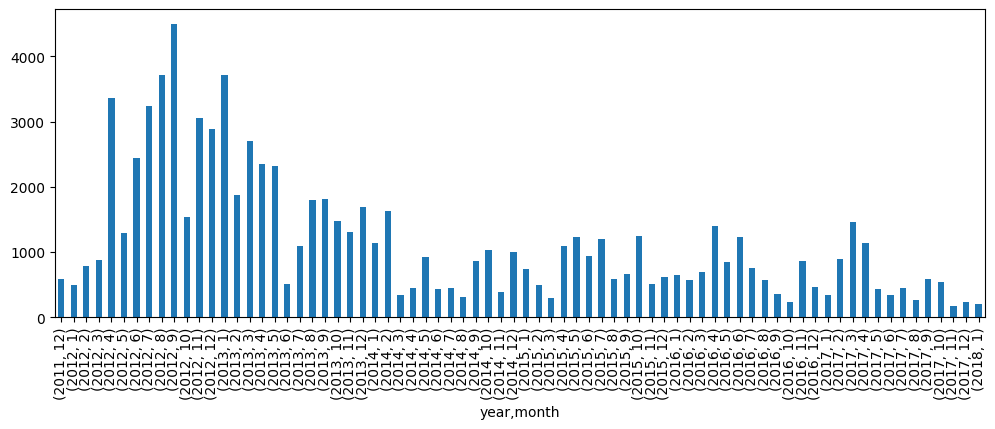

In [11]:
%matplotlib inline
# Plotando resultado

counts.plot(kind='bar', figsize = (12,4))
# Existem outras formas de fazer o gráfico de barra, que serão explorados de forma mais livre mais para frente, mas para esse exercício foi
# seguido conforme proposta do guia.

É possível observar que o projeto se mantém ativo, mas que ao longo do periodo sofreu uma diminuiu significativa os pull requests recebidos.

## 5. Existe camaradagem no projeto?

A estrutura organizacional varia de um projeto para outro e pode influenciar seu sucesso como colaborador. Um projeto que tem uma comunidade muito pequena pode não ser o melhor para começar a trabalhar. A pequena comunidade pode indicar uma alta barreira de entrada. Isso pode ser causado por vários fatores, incluindo uma comunidade que está relutante em aceitar pull requests de "outsiders", que a base de código é difícil de trabalhar, etc. No entanto, uma grande comunidade pode servir como um indicador de que o projeto estpa regularmente aceitando pull requests de novos contribuidores. Tal projeto seria um bom lugar para começar.<br>

Para avaliar a dinâmica da comunidade, traçaremos um histograma do número de pull requests enviados por cada usuário. Uma distribuição que mostra que há poucas pessoas que contribuem apenas com um pequeno número de pull requests pode ser usada como indicador de que o projeto não está recebendo novos contribuidores.

In [12]:
# Agrupando a contagem de pull requests por usuário
by_user = data.groupby('user')['pid'].count()

print(by_user)

user
0xmohit           2
193s              4
2m               20
4.00E+06         22
AlexeyIvanov8     2
                 ..
yinxusen          1
yllan             4
ziggystar        22
zsxwing           6
zuvizudar         1
Name: pid, Length: 464, dtype: int64


<AxesSubplot:ylabel='Frequency'>

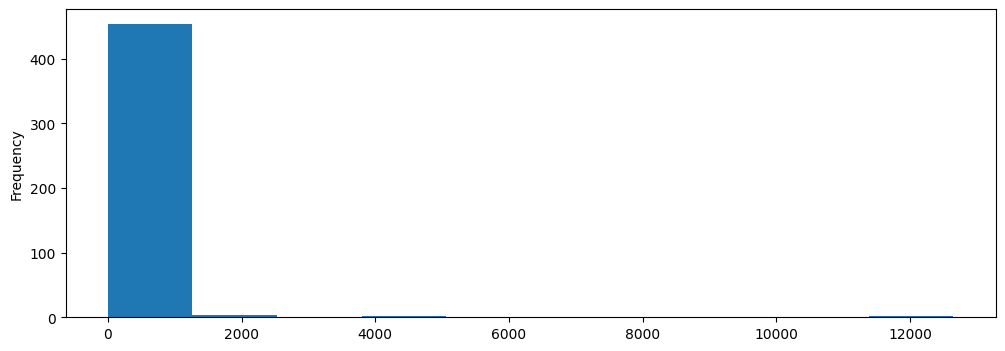

In [13]:
%matplotlib inline

# Plotando um histograma
by_user.plot(kind='hist', figsize = (12,4))

## 6. Quais arquivos foram alterados nas últimas dez pull requests?

## 7. Quem fez mais pull requests para um determinado arquivo?

## 8. Quem fez os últimos dez pull requests em um determinado arquivo?

## 9. Os pull requests de dois desenvolvedores especiais

## 10. Visualizando as contribuições de cada desenvolvedor

# Análises Extras